# Test De personnalité

Comment réagissez-vous sous la pression ?

In [ ]:
%run Test.py

In [ ]:
%run aggreg.py

## Imports

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import algo_knn
import matplotlib.pyplot as plt
import itertools
import threading
import time
import sys


## Traitement des données

In [147]:
df = pd.read_csv('DataSet__DataSet_complet__.csv')
df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B


In [148]:
list_col = df.columns
list_col

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Score',
       'Interpretation'],
      dtype='object')

In [149]:
df.shape

(215, 12)

In [150]:
l = df.columns
for i in l :
    print(i, ':', df[i].isnull().sum().sum())
df.describe

Q1 : 8
Q2 : 12
Q3 : 13
Q4 : 9
Q5 : 14
Q6 : 12
Q7 : 10
Q8 : 12
Q9 : 10
Q10 : 8
Score : 0
Interpretation : 0


<bound method NDFrame.describe of     Q1 Q2   Q3   Q4   Q5   Q6   Q7   Q8 Q9 Q10  Score Interpretation
0    a  a    a    a    a    1    1    1  1   1     10              B
1    b  b    b    b    b    2    2    2  2   2      0              C
2    c  c    c    c    c    3    3    3  3   3     20              A
3    a  b    c    a    b    1    2    3  1   2      8              C
4    b  c    a    c    a    3    2    3  1   2     11              B
..  .. ..  ...  ...  ...  ...  ...  ... ..  ..    ...            ...
210  c  c  NaN    c    c  NaN  NaN  3.0  3   3     14              B
211  b  a    c  NaN    b  NaN  2.0  NaN  3   2      5              C
212  a  c    b  NaN  NaN  1.0  NaN  3.0  2   3      8              C
213  a  n    e    a    b    v    t    Y  '   1      3              C
214  A  b    c   lk    k    n    2    0  5   3      4              C

[215 rows x 12 columns]>

In [151]:
df.describe
l = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
for i in l :
    print(i)
    for j in range(215):
        if not df[i][j] in ['a', 'b', 'c', '1', '2', '3'] :
            df[i][j] = None

df.describe

Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/1898599723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = None


<bound method NDFrame.describe of        Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9 Q10  Score  \
0       a     a     a     a     a     1     1     1     1   1     10   
1       b     b     b     b     b     2     2     2     2   2      0   
2       c     c     c     c     c     3     3     3     3   3     20   
3       a     b     c     a     b     1     2     3     1   2      8   
4       b     c     a     c     a     3     2     3     1   2     11   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  ..    ...   
210     c     c  None     c     c  None  None  None     3   3     14   
211     b     a     c  None     b  None  None  None     3   2      5   
212     a     c     b  None  None  None  None  None     2   3      8   
213     a  None  None     a     b  None  None  None  None   1      3   
214  None     b     c  None  None  None     2  None  None   3      4   

    Interpretation  
0                B  
1                C  
2                A  
3                

In [152]:
#remplacement des données manquante plutot qu'une suppression pour avoir une quantité de données plus conscéquente
df=df.fillna('b')

In [153]:
n = len(df['Q1'])
l = range(n)
print(l)
df=df.reindex(l)
df=df.dropna()
df.describe
print(df.shape)
print(df.index)

range(0, 215)
(215, 12)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
           dtype='int64', length=215)


In [158]:
#uniformisation des données pour le traitement par la version 1 du knn from scratch
#####NE PAS UTILISER POUR AUTRE CHOSE QUE LA V1####
#le chargement des données a été ajouté près de chaque versionde l'algorithme (V2, from scratch fournis en cours, SKlearn, Sklearn fournis en cours)
l = df.columns
for i in l :
    for j in range (215) :
        if df[i][j] == 'a' or df[i][j] == '1' or df[i][j] == 'A' :
            df[i][j]=1
        if df[i][j] == 'b' or df[i][j] == '2' or df[i][j] == 'B' :
            df[i][j]=2
        if df[i][j] == 'c' or df[i][j] == '3' or df[i][j] == 'C' :
            df[i][j]=3
            
df.describe

<bound method NDFrame.describe of     Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10  Score Interpretation
0    1  1  1  1  1  1  1  1  1   1     10              2
1    2  2  2  2  2  2  2  2  2   2      0              3
2    3  3  3  3  3  3  3  3  3   3     20              1
3    1  2  3  1  2  1  2  3  1   2      8              3
4    2  3  1  3  1  3  2  3  1   2     11              2
..  .. .. .. .. .. .. .. .. ..  ..    ...            ...
210  3  3  2  3  3  2  2  2  3   3     14              2
211  2  1  3  2  2  2  2  2  3   2      5              3
212  1  3  2  2  2  2  2  2  2   3      8              3
213  1  2  2  1  2  2  2  2  2   1      3              3
214  2  2  3  2  2  2  2  2  2   3      4              3

[215 rows x 12 columns]>

## Création des données jouet

In [73]:
X = df
y = df['Interpretation']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2) 

print(X_train)
index = X_test.index

    Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10  Score Interpretation
54   2  1  1  1  1  2  3  3  3   3     12              2
38   2  1  1  2  2  3  2  1  2   1      6              3
93   1  1  2  3  2  2  2  3  3   3     12              2
198  2  1  1  2  2  3  1  3  2   1      8              3
200  1  3  3  3  1  1  2  2  1   2     10              2
..  .. .. .. .. .. .. .. .. ..  ..    ...            ...
79   1  2  2  3  1  1  2  2  1   2      6              3
21   3  2  1  3  2  2  2  2  2   2      8              3
98   2  2  3  3  2  2  2  3  3   3     14              2
94   2  3  3  3  2  2  2  2  1   1     12              2
32   2  2  2  2  1  3  2  1  3   2      6              3

[172 rows x 12 columns]


## Execution de l'algorithme KNN from scratch

Dans une première version de l'algorithme j'ai utilisé l'entièreté du dataframe comme features, ce qui ne change pas énormément ke fonctionnement ici mais ne rends pas le programme appliquable sur de nouvelles données sans interprétations. J'ai également fait une version 2 qui cette fois n'utilise que les réponse au questions comme feature mais avec un taux de réussite moins bon.

### Fonctions permettant d'afficher les taux de réussite en fonction du nombre de voisins

In [80]:
#fonction remplissant un tableau avec le nombre de prédictions correctes en fonction du nombre de voisins
def essais_mult(metrics, nb_v) :
    X = df
    y = df['Interpretation']
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
    index = X_test.index
    c = 0
    for i in range(len(X_test)):
        d=algo_knn.KNN(X_train, X_test.iloc[i], nb_v, metrics)
        if Y_test.values[i] == d :
            c+=1
    return c

In [75]:
#fonction créant l'animation de chargement
done = False
#here is the animation
def animate():
    for c in itertools.cycle(['|', '/', '-', '\\']):
        if done:
            break
        sys.stdout.write('\rloading ' + c)
        sys.stdout.flush()
        time.sleep(0.1)
    sys.stdout.write('\rDone!     ')



loading |

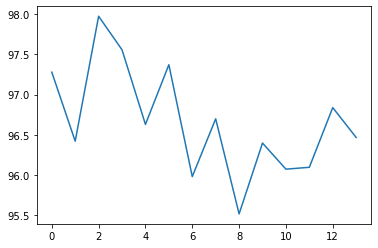

Done!     

In [81]:
done = False
t = threading.Thread(target=animate)
t.start()
list_pourc = []
#changer les paramètre pour tester avec la distance minkowski, les calculs prennent environ 35min avec ceux-ci
for j in range (1,15) :
	list_try = []
	iter = 100
	for i in range(iter) :
		list_try.append(essais_mult('euclidienne', j))
	k = (sum(list_try)/(len(X_test)*iter))*100
	list_pourc.append(k)
#plt.plot(list_try)
plt.plot(list_pourc)
plt.show()
done = True

### Version 2 de mon algoritthme

Cette version de mon algorithme KNN diffère de la première qui utilise incorrectement l'entièretée du dataframe comme features en utilisant ici que les réponses aux questions 1 à 12. Les résultats produits sont cependant moins bon que dans la version 1 (~80% de prédictions correctes contre ~95% pour la v1) 

In [184]:
#chargement des données de manière à correspondre aux attentes de la V2
df = pd.read_csv('DataSet__DataSet_complet__.csv')
list_col = df.columns
l = df.columns
l = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
for i in l :
    for j in range(215):
        if not df[i][j] in ['a', 'b', 'c', '1', '2', '3'] :
            df[i][j] = None
df=df.fillna('b')
print(df['Interpretation'].value_counts(dropna=False))
n = len(df['Q1'])
l = range(n)
df=df.reindex(l)


l = df.columns
for i in l :
    for j in range (len(df['Q1'])) :
        if df[i][j] == 'a' or df[i][j] == '1' :
            df[i][j]=1
        if df[i][j] == 'b' or df[i][j] == '2' :
            df[i][j]=2
        if df[i][j] == 'c' or df[i][j] == '3' :
            df[i][j]=3

X = df.drop(['Score', 'Interpretation'], axis=1)
y = df['Interpretation']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2) 

#éxecution du programme V2 de manière similaire à la V1
def essais_mult(metrics, nb_v) :
    X = df.drop(['Score', 'Interpretation'], axis=1)
    y = df['Interpretation']
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2) 
    index = X_test.index
    c = 0
    for i in range(len(X_test)):
        d=algo_knn.KNN_V2(X_train, Y_train, X_test.iloc[i], nb_v, metrics)
        if Y_test.values[i] == d :
            c+=1
    return c

done = False
#here is the animation
def animate():
    for c in itertools.cycle(['|', '/', '-', '\\']):
        if done:
            break
        sys.stdout.write('\rloading ' + c)
        sys.stdout.flush()
        time.sleep(0.1)
    sys.stdout.write('\rDone!     ')

t = threading.Thread(target=animate)
t.start()

list_pourc = []

for j in range (1,15) :
	list_try = []
	iter = 100
	for i in range(iter) :
		list_try.append(essais_mult('manhathan', j))
	k = (sum(list_try)/(len(X_test)*iter))*100
	list_pourc.append(k)

plt.plot(list_pourc)
plt.show()
done = True



C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3059187319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = None


C    139
B     71
A      5
Name: Interpretation, dtype: int64


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3059187319.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=1
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3059187319.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=2
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3059187319.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=3


loading |

AttributeError: module 'algo_knn' has no attribute 'KNN_V2'

loading \

## Avec le knn from scratch fourni en cours

In [163]:
#chargement des données d'une manière correspondant aux attentes du programme
import knn_prof
df = pd.read_csv('DataSet__DataSet_complet__.csv')
list_col = df.columns
l = df.columns
l = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
for i in l :

    for j in range(215):
        if not df[i][j] in ['a', 'b', 'c', '1', '2', '3'] :
            df[i][j] = None
df=df.fillna('b')
n = len(df['Q1'])
l = range(n)

df=df.reindex(l)


l = df.columns
for i in l :
    for j in range (215) :
        if df[i][j] == 'a' or df[i][j] == '1'  :
            df[i][j]=1
        if df[i][j] == 'b' or df[i][j] == '2'  :
            df[i][j]=2
        if df[i][j] == 'c' or df[i][j] == '3'  :
            df[i][j]=3





C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/1611078130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = None
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/1611078130.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=1
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/1611078130.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=2
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/1

In [98]:
#préparation des données d'entrainement et de test
X = df.drop(['Score', 'Interpretation'], axis=1)
y = df['Interpretation']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [191]:
#vérification rapide du fonctionnement
k = 3

for j in range (1,15):
    print(j)
    c = 0
    p = knn_prof.knn(X_test, X_train, Y_train, j, 'minkowski')
    for i in range(len(Y_test)) :
        Y_test.values[i]==p[i]
        c+=1
    print(c, '/', i+1)
done = True

1
loading /43 / 43
2
loading \43 / 43
3
loading -43 / 43
4
loading /43 / 43
5
loading |43 / 43
6
loading /43 / 43
7
loading -43 / 43
8
loading /43 / 43
9
loading -43 / 43
10
loading /43 / 43
11
loading |43 / 43
12
loading \ / 43
13
loading /43 / 43
14
loading -43 / 43
Done!     

loading \

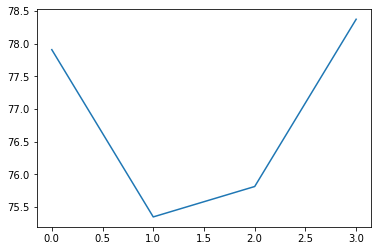

loading |

In [189]:
def essais_mult_prof(metrics, nb_v) :
    X = df.drop(['Score', 'Interpretation'], axis=1)
    y = df['Interpretation']
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2) 
    index = X_test.index
    d=knn_prof.knn(X_test, X_train, Y_train, nb_v, metrics)
    c = 0
    for i in range(len(Y_test)):
        if Y_test.values[i] == d[i] :
            c+=1
    return c

list_pourc = []
for j in range (1,5) :
	list_try = []
	iter = 10
	for i in range(iter) :
		list_try.append(essais_mult_prof('euclidean', j))
	k = (sum(list_try)/(len(X_test)*iter))*100
	list_pourc.append(k)

plt.plot(list_pourc)
plt.show()

## KNN avec SKlearn

#### Pour charger le DF

In [177]:
#charge le dataframe de manière correspondante aux attente de sklearn, en utilisant le chargement fait pour mon algorithme sklearn version 1 les données ne correspondent pas (les interprétation sont changées en valeurs chiffrées)
df = pd.read_csv('DataSet__DataSet_complet__.csv')
list_col = df.columns
l = df.columns
l = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
for i in l :

    for j in range(215):
        if not df[i][j] in ['a', 'b', 'c', '1', '2', '3'] :
            df[i][j] = None
df=df.fillna('b')
n = len(df['Q1'])
l = range(n)

df=df.reindex(l)


l = df.columns
for i in l :
    for j in range (215) :
        if df[i][j] == 'a' or df[i][j] == '1'  :
            df[i][j]=1
        if df[i][j] == 'b' or df[i][j] == '2'  :
            df[i][j]=2
        if df[i][j] == 'c' or df[i][j] == '3'  :
            df[i][j]=3


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3332382083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = None
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3332382083.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=1
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3332382083.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=2
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2656/3

#### Execution avec SKlearn

In [178]:
from sklearn.model_selection import KFold
#crossvalidation et K-fold avec sklearn
X = df.drop(['Score', 'Interpretation'], axis=1)
y = df['Interpretation']
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)


In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#création et ajustement du modèle
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [180]:
### Test pour vérification rapide du fonctionnement en comptant le nombre d'erreurs
p=(neigh.predict(X_test))
c=0
for i in range(len(Y_test)):
    print(p[i])
    print(y_test.values[i])
    if(p[i]!=y_test.values[i]):
        c+=1
    print('--')
print('===')
print(c, "/", i)

B
B
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
B
B
--
C
B
--
C
B
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
B
A
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
B
B
--
B
B
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
B
C
--
B
B
--
C
B
--
C
C
--
C
C
--
C
C
--
C
C
--
C
C
--
===
5 / 42


In [212]:
from sklearn.metrics import accuracy_score
#fonction calculant le taux de réussite des prédictions en fonction du nombre de voisins sélectionnés
def calcul_taux_voisin(nb_v) :
    list_taux = []
    for j in range (1,nb_v) :
        kf = KFold(n_splits=2)
        kf.get_n_splits(X)
        KFold(n_splits=2, random_state=None, shuffle=False)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
            y_train, y_test = y[train_index], y[test_index]

        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(X_train, y_train)
        c = 0
        p = neigh.predict(X_test)
        a = accuracy_score(y_test, p)
        print("Performance:", a)
        model.fit(X_train,y_train)
        print(X_train.shape,y_train.shape)
        for i in range(len(y_test)):
            if y_test.values[i] == p[i]:
                c+=1
        t = (c/len(p))*100
        list_taux.append(t)
    return list_taux

Performance: 0.8130841121495327
(108, 10) (108,)
Performance: 0.7850467289719626
(108, 10) (108,)
Performance: 0.719626168224299
(108, 10) (108,)
Performance: 0.7102803738317757
(108, 10) (108,)
Performance: 0.6915887850467289
(108, 10) (108,)
Performance: 0.7009345794392523
(108, 10) (108,)
Performance: 0.6542056074766355
(108, 10) (108,)
Performance: 0.6448598130841121
(108, 10) (108,)
Performance: 0.6635514018691588
(108, 10) (108,)
Performance: 0.6635514018691588
(108, 10) (108,)
Performance: 0.7009345794392523
(108, 10) (108,)
Performance: 0.6915887850467289
(108, 10) (108,)
Performance: 0.6915887850467289
(108, 10) (108,)
Performance: 0.6915887850467289
(108, 10) (108,)


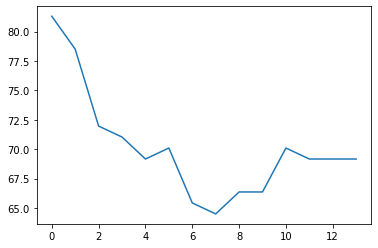

In [213]:
t=calcul_taux_voisin(15)
plt.plot(t)
plt.show()

### SKlearn fournis en cours

In [208]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=3)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_Train = X.iloc[train_index,:]
    Y_Train = y[train_index]
    
    X_Test = X.iloc[test_index,:]
    Y_Test = y[test_index]
    
    model = KNN(n_neighbors = 3)
    model.fit(X_Train,Y_Train)
    print(X_Train.shape, Y_Train.shape)
    y_pred = model.predict(X_Test)
    P = accuracy_score(Y_Test, y_pred)
    
    print("Performance:", P)

(143, 10) (143,)
Performance: 0.7777777777777778
(143, 10) (143,)
Performance: 0.7777777777777778
(144, 10) (144,)
Performance: 0.7183098591549296


In [218]:
from sklearn.model_selection import GridSearchCV

parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
'C': [1,2,3,10,20],
'max_iter': [1000,100000]}]

clf = GridSearchCV(
        KNN(), parameters, scoring='accuracy'
    )
clf.fit(X_Train, Y_Train)
print(clf.best_params_)

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


ValueError: Invalid parameter C for estimator KNeighborsClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [216]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())])

parameters = { 'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}

Exp = GridSearchCV(pipe, 
                   param_grid = parameters, 
                   cv = 2)

Exp.fit(X_Train, Y_Train)
print(Exp.best_params_)

{'svc__C': 1, 'svc__kernel': 'rbf'}
